In [0]:
!pip install mglearn

## 1. Expectation Maximization(EM)

(1) 관측되지 않는 잠재변수(unobserved latent variables) Z에 의존하는 확률 모델에서 최대가능도(ML), 최대사후확률(Maximum a posteriori, MAP)을 갖는 모수의 추정값을 찾는 반복적인 알고리즘. <br>
(2) 기댓값(E) 단계: 매개변수에 관한 추정값으로 로그가능도(Log Likelihood)의 기댓값을 계산. <br>
(3) 최대화(M) 단계: 기댓값을 최대화하는 변수값을 구하는 단계. <br>
(4) 절차
- 모수(매개변수)를 임의의 값으로 설정
- 모수 값에 관한 잠재변수 Z값을 추정
- 잠재변수를 이용해 모수를 다시추정
- 모수값과 잠재변수 값이 수렴할 때까지 2,3 반복.

(5) 핵심: 매개변수와 잠재변수 중 하나의 값을 알면 다른 값도 쉽게 알 수 있다.


* Reference <br>
https://tobeagoodmom.tistory.com/2152

## cf) 군집
- 유사성(similarity)을 비교해 각 데이터 포인트가 어느 cluster에 속하는지 예측. <br>
- 맞춤 광고, 영상 분할, 유전자 데이터 분석, SNS 실시간 검색어 분석 등 <br><br>

(1) K-means 장점: 단순하고 강력 <br>
(2) K-means 단점: 군집의 모양이 원형이 아닌 경우 동작 X, 군집의 갯수를 사용자가 지정해야 함. <br>



## 2. 병합 군집(Agglomerative Clustering)


(1) 각각의 데이터 포인터를 하나의 클러스터로 지정 <br>
(2) 지정된 갯수의 클러스터가 남을 때까지 가장 비슷한 두 클러스터를 합침. <br>
(3) 종료조건: cluster 갯수 <br>
(4) 단점: 새로운 데이터 포인트에 대해서는 예측할 수 없다. <br>
(5) 3가지 방식 존재<br>

- Ward: 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합치는 방식(기본값) <br>
- Average: 평균 거리가 가장 짧은 두 클러스터를 합치는 방식 <br>
- Complete: 최대 거리가 가장 짧은 두 클러스터를 합치는 방식 <br><br>

(6) 클러스터에 속한 포인터 수가 많이 다를 때(하나의 클러스터가 다른 것보다 매우 클 때) average나 complete가 더 성능 좋다.

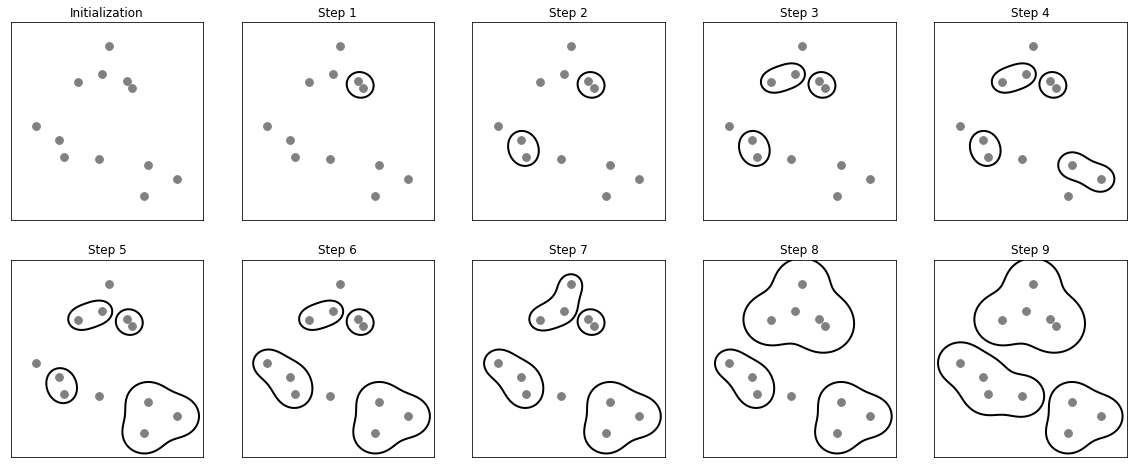

In [0]:
import mglearn
import matplotlib
import matplotlib.pyplot as plt

# matplotlib 설정
matplotlib.rc('font', family='AppleGoqthic')
plt.rcParams['axes.unicode_minus']=False

# 알고리즘 설명 시각화
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

make blobs(인위적 데이터)로 병합 군집 분석

# of clusters: 3


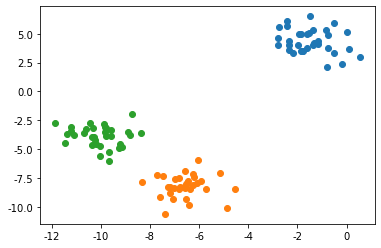

In [0]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np

#dataset
x,y = make_blobs(random_state=1)

num_cluster=int(input("# of clusters: "))

#create and train the model
#clusters=3
agg = AgglomerativeClustering(n_clusters=num_cluster)
assign = agg.fit_predict(x)

#배열 x 오른쪽에 열 한개 추가
a = assign.reshape(-1,1)
x1 = np.hstack([x,a])

#각 클래스별로 데이터 추출
for i in range(num_cluster):
  x_i=x1[x1[:,2]==i,:]
  plt.scatter(x_i[:,0],x_i[:,1], cmap=mglearn.cm3)

#x_1=x1[x1[:,2]==1,:]
#x_2=x1[x1[:,2]==2,:]
#x_3=x1[x1[:,2]==3,:]
#x_4=x1[x1[:,2]==4,:]


#Visualization

#plt.scatter(x_0[:,0],x_0[:,1], cmap=mglearn.cm3)
#plt.scatter(x_1[:,0],x_1[:,1], cmap=mglearn.cm3)
#plt.scatter(x_2[:,0],x_2[:,1], cmap=mglearn.cm3)
#plt.scatter(x_3[:,0],x_3[:,1], cmap=mglearn.cm3)
#plt.scatter(x_4[:,0],x_4[:,1], cmap=mglearn.cm3)


plt.show()



- Reference<br>
https://kolikim.tistory.com/31?category=733478 <br>
https://woolulu.tistory.com/48


## 3. 계층적 군집(Hierarchical Clustering)

(1) 병합 군집은 계층적 군집을 만든다. 작은 클러스터들이 모여 큰 클러스터를 이루는 계층 구조. <br>
(2) 개별 데이터 포인트들을 순차적, 계층적으로 유사한 클러스터로 통합하여 군집화를 수행하는 알고리즘. <br>
(3) 장점: 클러스터의 개수를 사전에 정하지 않아도 학습할 수 있다. <br>
(4) 2가지 방식 존재
- 상향식의 병합 군집 방식: 개개의 포인트를 순차적으로 병합 <br>
- 하향식의 분할 군집 방식: 전체를 하나의 클러스터로 하여 그것을 분할. <br>


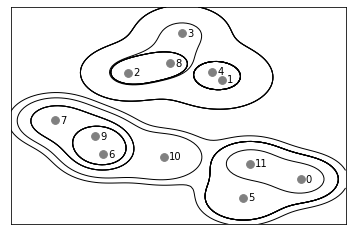

In [0]:
#병합 군집으로 생성한 계층적 군집
mglearn.plots.plot_agglomerative()
plt.show()

- dendrogram: 계층 군집을 시각화하는 도구. <br>
- 계층적 군집에서 클러스터 갯수를 정해주지 않아도 학습 수행 가능한 이유: 결합 순서를 나타내는 덴드로그램 덕분. <br>
- 계층적으로 군집화 완료 후, 사용자가 시각화된 덴드로그램을 보고 클러스터를 나눌 수 있도록 한다. <br>
- 가지의 길이: 클러스터 사이의 거리를 나타낸다.

(0.0, 120.0)


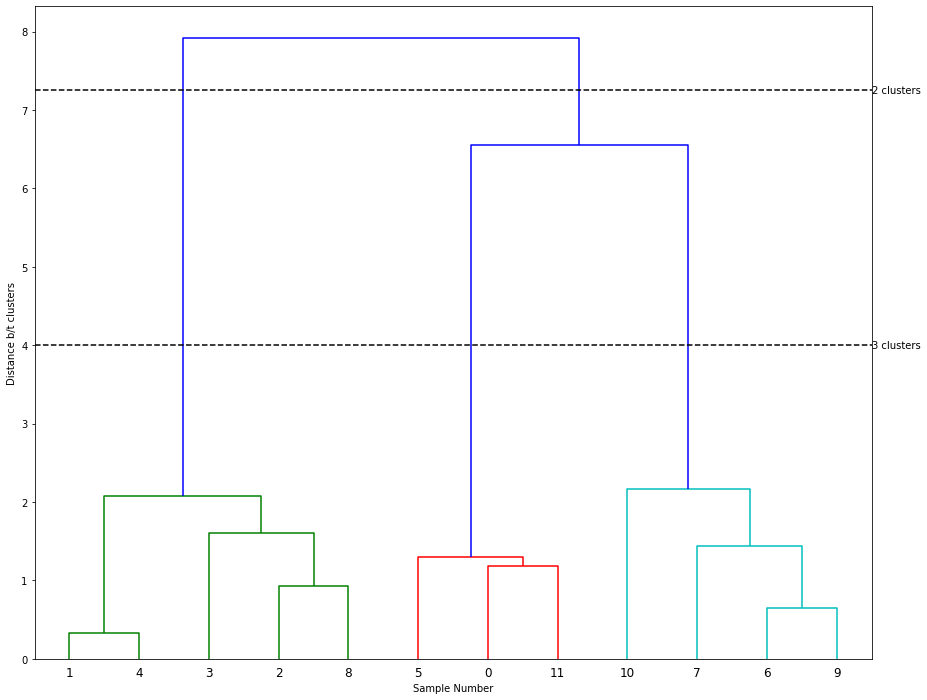

In [0]:
from scipy.cluster.hierarchy import dendrogram, ward

#dataset
x,y = make_blobs(random_state=0, n_samples=12)
#print(x)

#데이터 배열 x에 ward 함수 적용
#ward 함수: 병합 군집 수행 시 생성된 거리 정보가 담긴 배열 반환.

linkage_array = ward(x)
#print(linkage_array)
dendrogram(linkage_array)

#get current axes
ax=plt.gca()

#x축 데이터(처음과 끝), 최소/최대값을 가진 (1,2)리스트
bounds=ax.get_xbound()
print(bounds)

#임의로 라인 생성
ax.plot(bounds,[7.25,7.25],linestyle='--',c='k')
# bounds: x축 끝
ax.text(bounds[1],7.25,'2 clusters', va='center')

#임의로 라인 생성
ax.plot(bounds,[4,4],linestyle='--',c='k')
# bounds: x축 끝
ax.text(bounds[1],4,'3 clusters', va='center')

plt.xlabel('Sample Number')
plt.ylabel('Distance b/t clusters')
plt.show()

* Reference <br>
https://datascienceschool.net/view-notebook/e335aec955e844a981b41e4e11f79174/ <br>
https://kolikim.tistory.com/31?category=733478 <br>

## 4. DBSCAN(Density-based spatial clustering of application with noise)

(1) K-means 장점: 단순하고 강력 <br>
(2) K-means 단점: 군집의 모양이 원형이 아닌 경우 동작 X, 군집의 갯수를 사용자가 지정해야 함. <br>
(3) 데이터가 밀집한 정도(밀도)를 이용. <br>
(4) 장점: 군집의 형태에 구애X, 군집의 갯수를 사용자가 지정할 필요가 없다. <br> 단점: k-means, 병합 군집에 비해 느리다. <br>
(5) 사용자 인수
- 최소거리 eps: 이웃(neighborhood)을 정의하기 위한 거리 <br>
- 최소 데이터 갯수(min_samples): 밀집지역을 정의하기 위해 필요한 이웃의 갯수 <br>

(6) 밀집지역: 특성 공간에서 가까이 있는 데이터가 붐비는 지역<br>
(7) 핵심 데이터: eps 거리 안에 최소 데이터 갯수 이상의 데이터가 있으면, 그 데이터는 핵심 데이터(밀집 지역에 있는 데이터)<br>
(8) 핵심 데이터의 이웃 영역(eps)안에 있는 데이터: 핵심 데이터(동일 클러스터)<br>
(9) 더 이상 이웃이 없으면 이 데이터: 경계(border) 데이터<br>
(10) 이외의 데이터: 잡음 데이터(outlier)<br>



### 알고리즘
(1) 무작위로 데이터 포인트 선택 <br>
(2) 해당 포인트에서 eps 거리 안의 모든 포인트를 찾음. <br>
- (2-1) eps 거리 안의 데이터 포인트 수 < min_samples : 잡음noise로 레이블
- (2-2) eps 거리 안의 데아터 포인트 수 > min_samples : 핵심 포인트로 레이블, 새로운 클러스터 레이블 할당 <br>

(3) 2-2 핵심 포인트의 eps 거리 안의 모든 이웃을 살핌 <br>
- (3-1) 어떤 클러스터에도 아직 할당 X -> 바로 전에 만든 클러스터 레이블 할당
- (3-2) 핵심 포인트면 그 포인트의 이웃을 차례로 확인

(4) eps 거리 안에 더이상 핵심 포인트가 없을 때까지 진행

참고<br>
https://bcho.tistory.com/1205

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


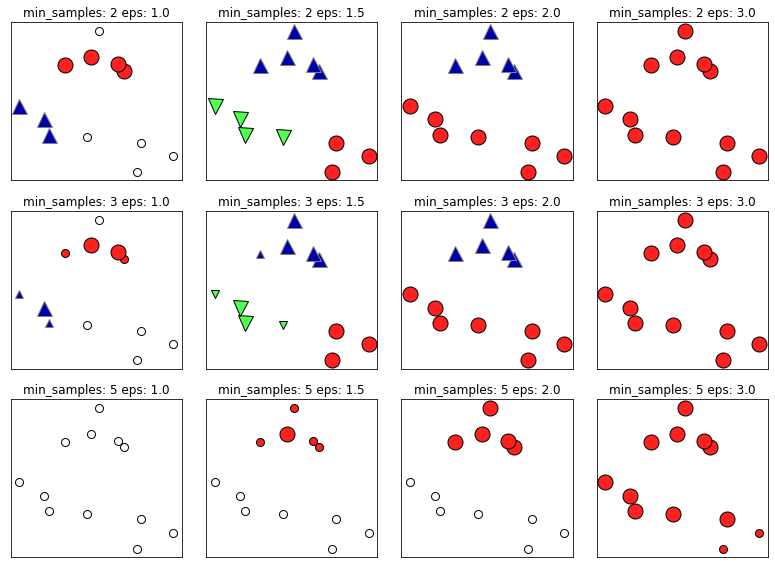

In [0]:
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc

#matplotlib 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

mglearn.plots.plot_dbscan()
plt.show()

### Graph 해석
- cluster에 속한 포인트: 색상있음 <br>
- 잡음 포인트: 하얀색 <br>
- 핵심 포인트: 크게 <br>
- 경계 포인트: 작게 <br><br>
- eps 증가 -> 하나의 클러스터에 더 많은 포인트 포함. <br>
- min_samples 증가 -> 핵심 포인트 수 증가, 잡음 포인트 감소

### 장점
- 클러스터의 수를 정하지 않아도 된다.
- 기하학적인 모양을 갖는 군집도 잘 찾을 수 있다.
- Noise point를 통하여, outlier 검출 가능

* Reference <br>
https://woolulu.tistory.com/49?category=779546 <br>
https://datascienceschool.net/view-notebook/e335aec955e844a981b41e4e11f79174/ <br>